In [1]:
!pip install ../../../oceans_sf
import warnings

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import seaborn as sns
import xarray as xr

import oceans_sf as ocsf

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
warnings.filterwarnings("ignore")

Processing /Users/brodiepearson/GitHub/oceans_sf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for oceans_sf: filename=oceans_sf-0.0.0-py3-none-any.whl size=21295 sha256=2289374ded50f91d44471d7107bf2634878aad47ae4daa822f119be898c28b38
  Stored in directory: /private/var/folders/hw/qnv0wm_x4p7bt8y7tw33cxjh0000gn/T/pip-ephem-wheel-cache-toenl3a0/wheels/e3/68/41/f3613eeb990e8b1c0afca135fa4a096f8b5521ff9c29b52b8f
Successfully built oceans_sf
  Attempting uninstall: oceans_sf
    Found existing installation: oceans_sf 0.0.0
    Uninstalling oceans_sf-0.0.0:
      Successfully uninstalled oceans_sf-0.0.0


In [2]:
ds = xr.load_dataset("example_data/langmuir_fields.nc")
ds = ds.isel(time=1)

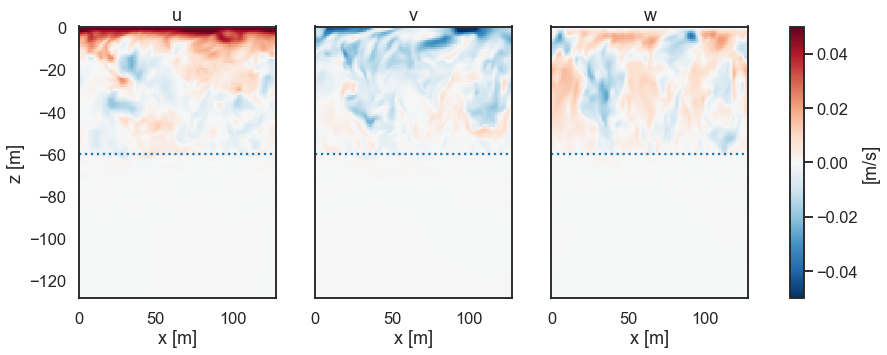

In [10]:
fig, ax = plt.subplots(1,3, figsize=(15,5),sharey=True)

pc1 = ax[0].pcolormesh(ds.xC, ds.zC, ds.u[:,64,:], cmap="RdBu_r",vmin=-0.05,vmax=0.05)
pc2 = ax[1].pcolormesh(ds.xC, ds.zC, ds.v[:,64,:], cmap="RdBu_r",vmin=-0.05,vmax=0.05)
pc3 = ax[2].pcolormesh(ds.xC, ds.zF, ds.w[:,64,:], cmap="RdBu_r",vmin=-0.05,vmax=0.05)


ax[0].plot([0, 128], [-60, -60], ':')
ax[1].plot([0, 128], [-60, -60], ':')
ax[2].plot([0, 128], [-60, -60], ':')


ax[0].set_ylabel("z [m]")
ax[0].set_xlabel("x [m]")
ax[1].set_xlabel("x [m]")
ax[2].set_xlabel("x [m]")

ax[0].set_title("u")
ax[1].set_title("v")
ax[2].set_title("w")

cbar = fig.colorbar(pc1, ax=ax, orientation="vertical",label='[m/s]')

In [4]:
nn = 128

sf = ocsf.generate_structure_functions_3d(
    ds.u.values[-60:,:nn,:], 
    ds.v.values[-60:,:nn,:], 
    ds.w.values[-60:,:nn,:], 
    ds.xF.values[:nn], 
    ds.yF.values[:nn], 
    ds.zF.values[-60:], 
    traditional_type=['LL','LLL','LTT'],
    boundary=["periodic-x", "periodic-y"]
)

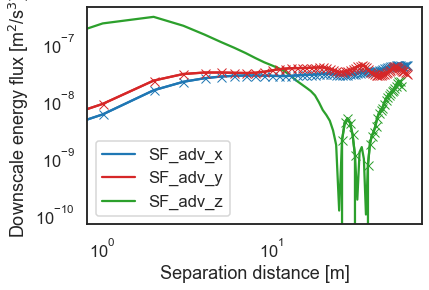

In [5]:
plt.loglog(sf['x-diffs'],abs(sf['SF_advection_velocity_x']/2),color='tab:blue',label='SF_adv_x')
plt.loglog(sf['y-diffs'],abs(sf['SF_advection_velocity_y']/2),color='tab:red',label='SF_adv_y')
plt.loglog(sf['z-diffs'],abs(sf['SF_advection_velocity_z']/2),color='tab:green',label='SF_adv_z')

plt.loglog(sf['x-diffs'],-(sf['SF_advection_velocity_x']/2),color='tab:blue',marker='x')
plt.loglog(sf['y-diffs'],-(sf['SF_advection_velocity_y']/2),color='tab:red',marker='x')
plt.loglog(sf['z-diffs'],-(sf['SF_advection_velocity_z']/2),color='tab:green',marker='x')

plt.xlabel('Separation distance [m]')
plt.ylabel('Downscale energy flux [m$^2$/s$^3$]')
plt.legend();

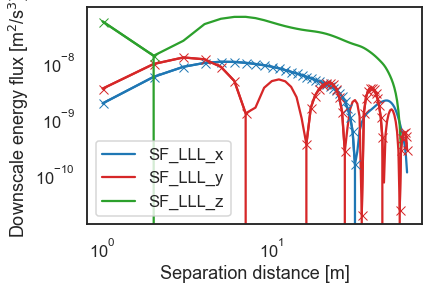

In [6]:
plt.loglog(sf['x-diffs'],abs(-5*sf['SF_LLL_x']/(4*sf['x-diffs'])),color='tab:blue',label='SF_LLL_x')
plt.loglog(sf['y-diffs'],abs(-5*sf['SF_LLL_y']/(4*sf['y-diffs'])),color='tab:red',label='SF_LLL_y')
plt.loglog(sf['z-diffs'],abs(-5*sf['SF_LLL_z']/(4*sf['z-diffs'])),color='tab:green',label='SF_LLL_z')

plt.loglog(sf['x-diffs'],-(-5*sf['SF_LLL_x']/(4*sf['x-diffs'])),color='tab:blue',marker='x')
plt.loglog(sf['y-diffs'],-(-5*sf['SF_LLL_y']/(4*sf['y-diffs'])),color='tab:red',marker='x')
plt.loglog(sf['z-diffs'],-(-5*sf['SF_LLL_z']/(4*sf['z-diffs'])),color='tab:green',marker='x')

plt.xlabel('Separation distance [m]')
plt.ylabel('Downscale energy flux [m$^2$/s$^3$]')
plt.legend();

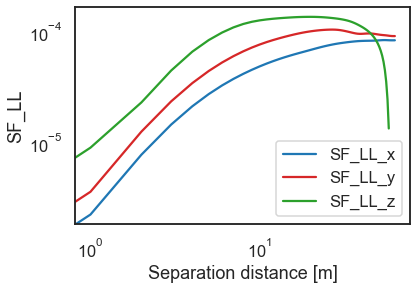

In [7]:
plt.loglog(sf['x-diffs'],sf['SF_LL_x'],label='SF_LL_x',color='tab:blue')
plt.loglog(sf['y-diffs'],sf['SF_LL_y'],label='SF_LL_y',color='tab:red')
plt.loglog(sf['z-diffs'],sf['SF_LL_z'],label='SF_LL_z',color='tab:green')

plt.xlabel('Separation distance [m]')
plt.ylabel('SF_LL')
plt.legend();

In [8]:
sf['z-diffs']

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58.])

In [9]:
sf['SF_LLL_z']

array([ 0.00000000e+00,  4.21475159e-08,  2.06444196e-08, -5.73599056e-08,
       -1.51512608e-07, -2.35881094e-07, -3.05759225e-07, -3.57372943e-07,
       -3.87685714e-07, -4.00644721e-07, -4.05943357e-07, -4.10614955e-07,
       -4.17407909e-07, -4.27086169e-07, -4.38884591e-07, -4.52517003e-07,
       -4.68637692e-07, -4.86253208e-07, -5.02958671e-07, -5.16718311e-07,
       -5.26703891e-07, -5.32925301e-07, -5.35152657e-07, -5.34029498e-07,
       -5.30991503e-07, -5.26528835e-07, -5.21140289e-07, -5.15853419e-07,
       -5.11424841e-07, -5.08235414e-07, -5.06623257e-07, -5.06785990e-07,
       -5.07692800e-07, -5.07529248e-07, -5.04462030e-07, -4.97452862e-07,
       -4.86804255e-07, -4.73888255e-07, -4.59925551e-07, -4.45022513e-07,
       -4.29017893e-07, -4.12196513e-07, -3.94671117e-07, -3.76887440e-07,
       -3.59396253e-07, -3.41861179e-07, -3.22730419e-07, -3.00697397e-07,
       -2.76292468e-07, -2.51019697e-07, -2.25685683e-07, -2.00220354e-07,
       -1.74132040e-07, -

In [16]:
ds.u[:,:,:], ds.u[:,:,-0:]

(<xarray.DataArray 'u' (zC: 128, yC: 128, xF: 128)>
 array([[[-1.32538245e-06, -1.38091785e-06, -1.43245449e-06, ...,
          -1.13646307e-06, -1.20297673e-06, -1.26601096e-06],
         [-1.33735774e-06, -1.39344915e-06, -1.44551391e-06, ...,
          -1.14660309e-06, -1.21375618e-06, -1.27740227e-06],
         [-1.34885733e-06, -1.40553718e-06, -1.45816463e-06, ...,
          -1.15618525e-06, -1.22400241e-06, -1.28828782e-06],
         ...,
         [-1.28689521e-06, -1.34097403e-06, -1.39115031e-06, ...,
          -1.10293645e-06, -1.16769738e-06, -1.22907820e-06],
         [-1.30012003e-06, -1.35464766e-06, -1.40523870e-06, ...,
          -1.11460316e-06, -1.17991920e-06, -1.24181927e-06],
         [-1.31295981e-06, -1.36797342e-06, -1.41901831e-06, ...,
          -1.12578800e-06, -1.19168875e-06, -1.25414042e-06]],
 
        [[-1.33236724e-06, -1.38803380e-06, -1.43968181e-06, ...,
          -1.14292752e-06, -1.20963626e-06, -1.27284392e-06],
         [-1.34445567e-06, -1.40067